<a href="https://colab.research.google.com/github/Shuaynat/DSE-23-24/blob/main/DS_ICEF_class3_trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This class is about classification and Decision trees

#Decison Trees in sklearn

Our third class. will bee devoted to classification problem and DEcision tree classifier:

Let us load data

In [ ]:
!wget -c https://raw.githubusercontent.com/Shuaynat/DSE-23-24/main/01-classes/flats_moscow.csv


200 OK
Length: 66976 (65K) [text/plain]
Saving to: ‘flats_moscow.csv’

flats_moscow.csv    100%[===================>]  65.41K  --.-KB/s    in 0.04s   

2023-09-18 22:09:34 (1.53 MB/s) - ‘flats_moscow.csv’ saved [66976/66976]



In [ ]:
import pandas as pd
flats = pd.read_csv("flats_moscow.csv")

In [ ]:
flats.head()

,Unnamed: 0,price,totsp,livesp,kitsp,dist,metrdist,walk,brick,floor,code
0,1,81,58,40,6.0,12.5,7,1,1,1,3
1,2,75,44,28,6.0,13.5,7,1,0,1,6
2,3,128,70,42,6.0,14.5,3,1,1,1,3
3,4,95,61,37,6.0,13.5,7,1,0,1,1
4,5,330,104,60,11.0,10.5,7,0,1,1,3


In [ ]:
flats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2040 entries, 0 to 2039
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2040 non-null   int64  
 1   price       2040 non-null   int64  
 2   totsp       2040 non-null   int64  
 3   livesp      2040 non-null   int64  
 4   kitsp       2040 non-null   float64
 5   dist        2040 non-null   float64
 6   metrdist    2040 non-null   int64  
 7   walk        2040 non-null   int64  
 8   brick       2040 non-null   int64  
 9   floor       2040 non-null   int64  
 10  code        2040 non-null   int64  
dtypes: float64(2), int64(9)
memory usage: 175.4 KB


Suppose we want to predict the walk variable:
to classify whether flat is within walking distance or not

In [ ]:
import sklearn


In [ ]:
flats.columns

Index(['Unnamed: 0', 'price', 'totsp', 'livesp', 'kitsp', 'dist', 'metrdist',
       'walk', 'brick', 'floor', 'code'],
      dtype='object')

In [ ]:
flats.columns[flats.columns!="walk"]

Index(['Unnamed: 0', 'price', 'totsp', 'livesp', 'kitsp', 'dist', 'metrdist',
       'brick', 'floor', 'code'],
      dtype='object')

Define X and y

In [ ]:
y_flats = flats["walk"]
X_flats = flats[flats.columns[flats.columns!="walk"]]

Make classification using decision tree classifier


In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
clf = DecisionTreeClassifier(max_depth=3)

Fit a decision tree

In [ ]:
clf.fit(X = X_flats,y = y_flats)

DecisionTreeClassifier(max_depth=3)

[Text(0.5, 0.875, 'x[6] <= 3.5\ngini = 0.431\nsamples = 2040\nvalue = [641, 1399]'),
 Text(0.25, 0.625, 'x[5] <= 14.0\ngini = 0.044\nsamples = 223\nvalue = [5, 218]'),
 Text(0.125, 0.375, 'x[4] <= 5.5\ngini = 0.02\nsamples = 194\nvalue = [2, 192]'),
 Text(0.0625, 0.125, 'gini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.1875, 0.125, 'gini = 0.01\nsamples = 190\nvalue = [1, 189]'),
 Text(0.375, 0.375, 'x[2] <= 73.5\ngini = 0.185\nsamples = 29\nvalue = [3, 26]'),
 Text(0.3125, 0.125, 'gini = 0.0\nsamples = 20\nvalue = [0, 20]'),
 Text(0.4375, 0.125, 'gini = 0.444\nsamples = 9\nvalue = [3, 6]'),
 Text(0.75, 0.625, 'x[5] <= 12.85\ngini = 0.455\nsamples = 1817\nvalue = [636, 1181]'),
 Text(0.625, 0.375, 'x[5] <= 5.5\ngini = 0.412\nsamples = 1242\nvalue = [360, 882]'),
 Text(0.5625, 0.125, 'gini = 0.103\nsamples = 129\nvalue = [7, 122]'),
 Text(0.6875, 0.125, 'gini = 0.433\nsamples = 1113\nvalue = [353, 760]'),
 Text(0.875, 0.375, 'x[5] <= 15.0\ngini = 0.499\nsamples = 575\nvalue = [276, 

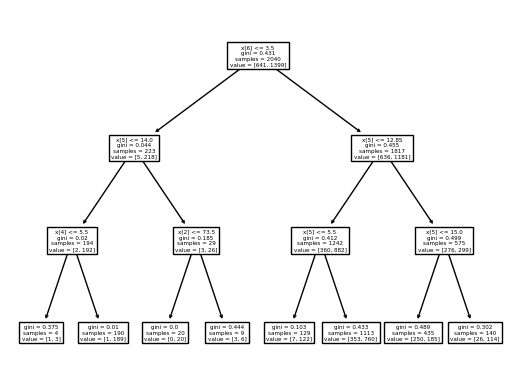

In [ ]:
sklearn.tree.plot_tree(clf)

Beatiful tree

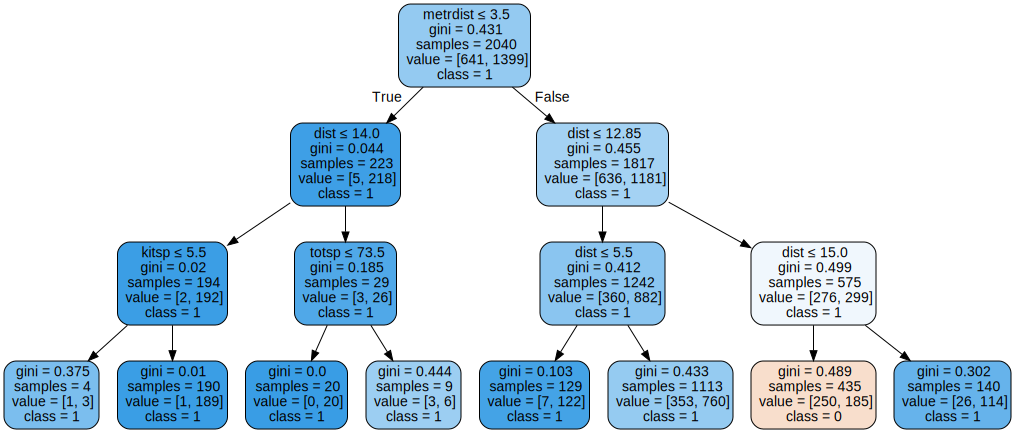

In [ ]:
import graphviz
dot_data = sklearn.tree.export_graphviz(clf, out_file=None,
                     feature_names=X_flats.columns,
                      class_names = ["0","1"],
                    filled=True, rounded=True,
                      special_characters=True)
graph = graphviz.Source(dot_data)
graph

Let us look at how we can make our tree more stable

# Main Parametres of Decision tree
What we should take into account while constructing a decision tree:

*   max_depth is maximum depth of the tree
*   min_samples_leaf is the constrain on minimum number of elements in a leaf

Cost function:
* criterion{“gini”, “entropy”, “log_loss”}



Let us put constrain on min_samples_leaf = 5% of dataset

In [ ]:
clf2 = sklearn.tree.DecisionTreeClassifier(max_depth=5,
                                           min_samples_leaf=int(0.05*len(X_flats)),
                                           max_leaf_nodes = 10)

Fit tree

In [ ]:
clf2.fit(X_flats, y_flats)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=10, min_samples_leaf=102)

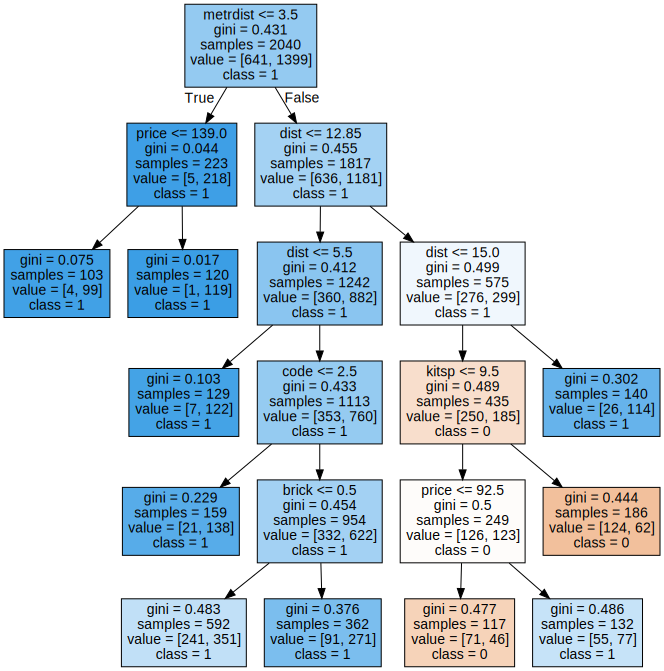

In [ ]:
import graphviz
dot_data = sklearn.tree.export_graphviz(clf2,
                     feature_names=X_flats.columns,
                      class_names = ["0","1"],
                                        filled = True,
                                        )
graph = graphviz.Source(dot_data)
graph

How to measure quality of classification:

Approach:



1.   On one part of dataset train your algorithm
2.  On test part evaluate classification and make prediction comparison with true data




# Decision tree Regression

Create a dataset:

Want create it manually using numpy library

A random sample of dimension 1 from donut distribution

In [ ]:
import matplotlib.pyplot as plt


Create X_data and plot it

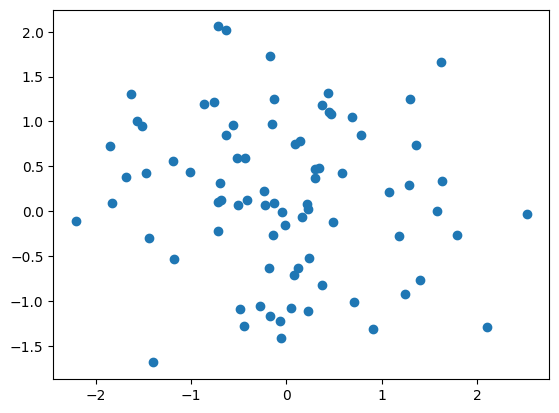

In [ ]:
import numpy as np
num_samples = 80
dimension = 2
X_data = np.random.normal(size = (num_samples, dimension))

#plot
plt.scatter(X_data[:, 0], X_data[:, 1])

In [ ]:
import numpy as np
y_data = X_data[:,1]**2 + X_data[:,0]**2

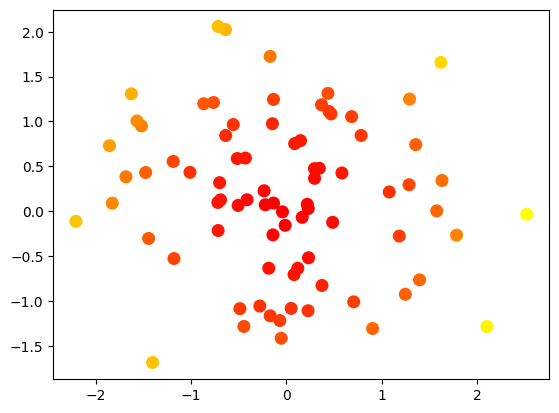

In [ ]:
plt.scatter(X_data[:, 0], X_data[:, 1],c=y_data, s = 70,cmap = "autumn")

In [ ]:
clf = sklearn.tree.DecisionTreeRegressor(random_state=24)
clf.fit(X_data, y_data)

y_pred = clf.predict(X_data)
print(y_pred)

[3.25137121e+00 2.77432698e+00 2.64213321e-02 2.52723704e+00
 2.53086800e+00 1.19608780e+00 1.47544388e+00 1.11710769e+00
 2.00892138e+00 1.24212701e+00 4.50205632e+00 3.00471010e+00
 5.18621861e-01 1.54065923e+00 9.71311586e-01 2.05117296e+00
 1.73641326e+00 3.19853416e-02 5.74477668e-01 2.48181803e+00
 5.33050632e-02 2.50752373e-02 5.91321699e-01 3.33892721e+00
 5.36877918e+00 4.93647553e-01 1.38948795e+00 1.84950083e+00
 1.28236643e+00 5.43540867e-02 5.30405814e-02 2.97671359e+00
 5.05288531e-01 8.24596932e-01 2.50117411e-01 3.46914955e-01
 4.35404652e+00 8.99669334e-02 2.17917132e+00 1.51893331e+00
 4.74861378e+00 1.41871880e+00 2.20758744e-01 5.35115399e-01
 3.97152026e+00 1.86735351e-01 1.20935109e+00 2.18477240e+00
 6.34717893e+00 4.88298525e+00 4.81200046e+00 4.38573317e-01
 3.20918437e+00 1.06494558e-01 4.19844259e-01 2.60647404e-01
 2.41064648e+00 5.26196530e-01 1.56887537e+00 3.22675201e+00
 1.17646219e+00 6.09970488e-01 1.49031083e+00 6.06642680e+00
 1.57687696e+00 1.912685

##Visualisation (make look difficult in code, but it is mainly for your understanding of the visualization of a tree surface)

Create a meshgrid

In [ ]:
def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

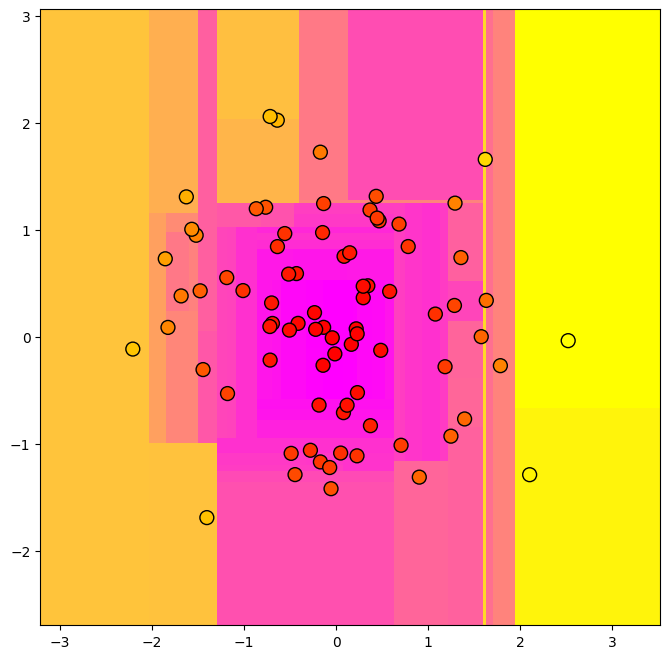

In [ ]:
xx, yy = get_grid(X_data)

predicted = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(8, 8))
plt.pcolormesh(xx, yy, predicted, cmap='spring')
plt.scatter(X_data[:, 0], X_data[:, 1], c=y_data, s=100, cmap='autumn', edgecolor='k')

In [ ]:
print(predicted)

[[4.88298525 4.88298525 4.88298525 ... 6.0664268  6.0664268  6.0664268 ]
 [4.88298525 4.88298525 4.88298525 ... 6.0664268  6.0664268  6.0664268 ]
 [4.88298525 4.88298525 4.88298525 ... 6.0664268  6.0664268  6.0664268 ]
 ...
 [4.88298525 4.88298525 4.88298525 ... 6.34717893 6.34717893 6.34717893]
 [4.88298525 4.88298525 4.88298525 ... 6.34717893 6.34717893 6.34717893]
 [4.88298525 4.88298525 4.88298525 ... 6.34717893 6.34717893 6.34717893]]


Now let us vary number of parametres in a list

In [ ]:
#plotting size of a figure


<Figure size 1400x1400 with 0 Axes>

<Figure size 1400x1400 with 0 Axes>

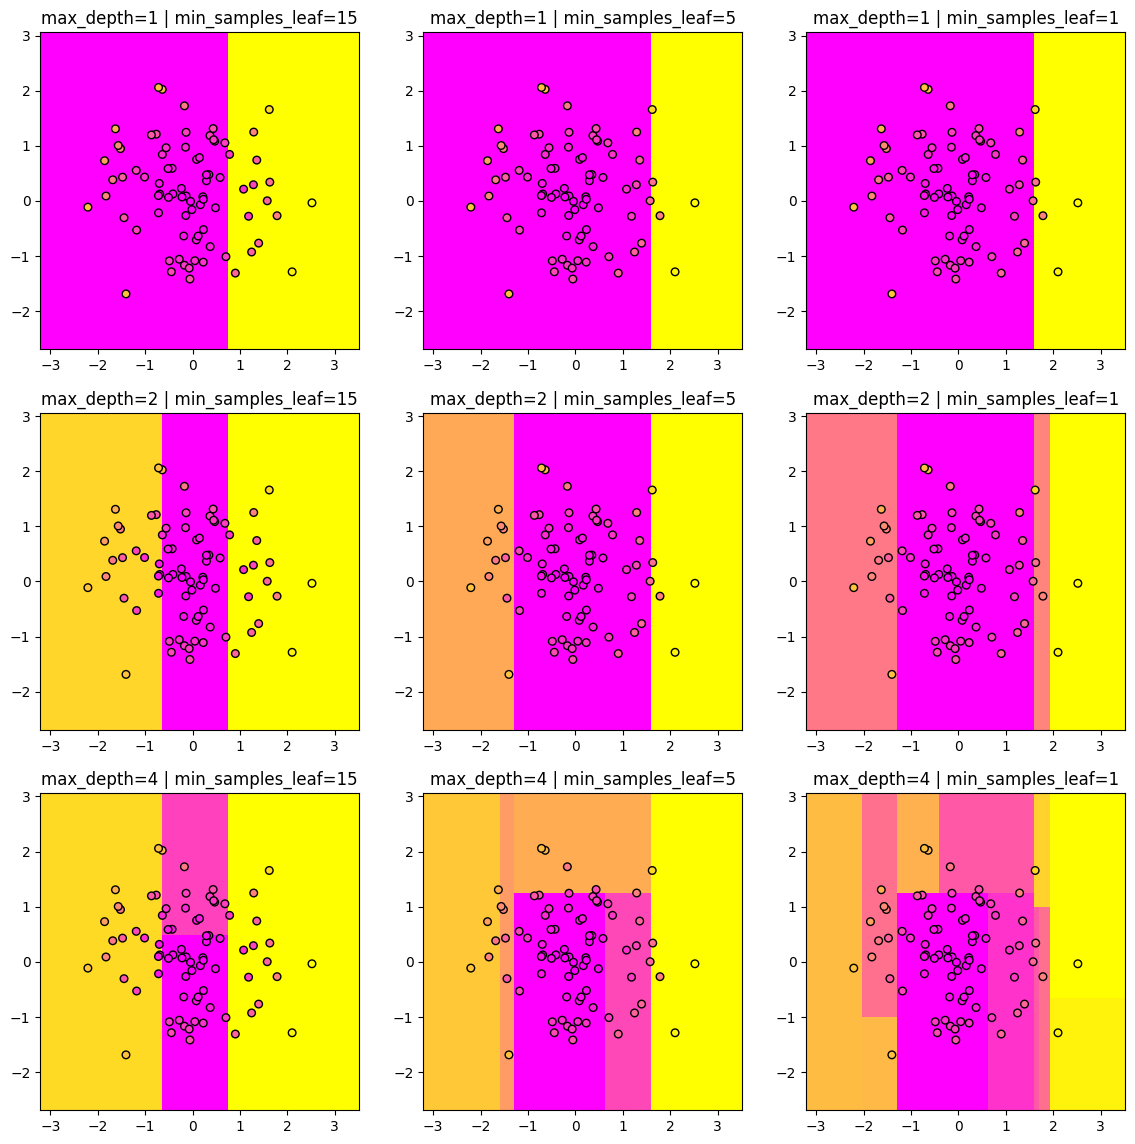

In [ ]:
plt.figure(figsize=(14, 14))
for i, max_depth in enumerate([1, 2, 4]):
    for j, min_samples_leaf in enumerate([15, 5, 1]):

        clf = sklearn.tree.DecisionTreeRegressor(max_depth=max_depth, min_samples_leaf=min_samples_leaf)
        clf.fit(X_data, y_data)
        xx, yy = get_grid(X_data)
        predicted = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

        plt.subplot2grid((3, 3), (i, j))
        plt.pcolormesh(xx, yy, predicted, cmap='spring')
        plt.scatter(X_data[:, 0], X_data[:, 1], c=y_data, s=30, cmap='spring', edgecolor='k')
        plt.title('max_depth=' + str(max_depth) + ' | min_samples_leaf=' + str(min_samples_leaf))

##Decision trees are not stable and can overfit over data very strongly

We train on subset of 90% of dataset

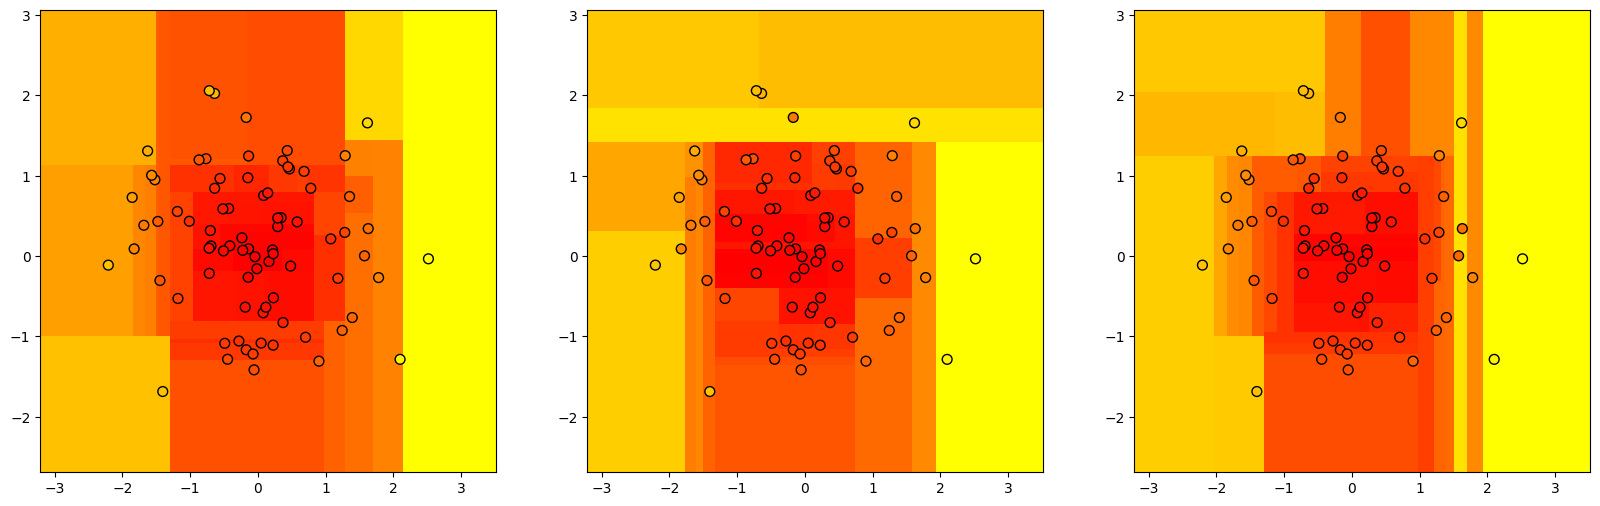

In [ ]:
plt.figure(figsize=(20, 6))
for i in range(3):
    clf = sklearn.tree.DecisionTreeRegressor(random_state=42)

    indecies = np.random.randint(X_data.shape[0], size=int(X_data.shape[0] * 0.9))
    clf.fit(X_data[indecies], y_data[indecies])
    xx, yy = get_grid(X_data)
    predicted = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    plt.subplot2grid((1, 3), (0, i))
    plt.pcolormesh(xx, yy, predicted, cmap='autumn')
    plt.scatter(X_data[:, 0], X_data[:, 1], c=y_data, s=50, cmap='autumn', edgecolor='k')

#Classification
Metrics of classification:


*   Accuracy
*   Precision
*   Recall
*   ROC AUC



## Precision and Recall

Precision and Recall are two other measures for evaluation of classification quality. Both of the metrics are calculated based on **confusion matrix**.

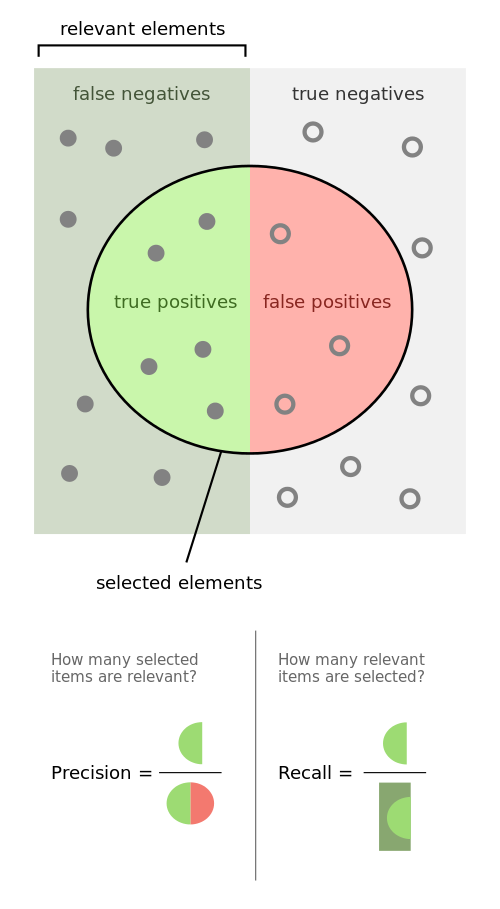<img

Note that Recall equals to True Positive Rate.

Train Test split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_flats, y_flats, test_size=0.33, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf_flats = DecisionTreeClassifier()
clf_flats.fit(X_train,y_train)
y_flats_pred = clf_flats.predict(X_test)

The accuracy on the test dataset:

In [ ]:
sklearn.metrics.accuracy_score(y_true=y_test, y_pred = y_flats_pred)

0.7329376854599406

Recall

In [ ]:
def my_accuracy(y_true,y_pred):
  return len(y_test[y_true==y_pred])/len(y_true)

In [ ]:
def my_precision(y_true, y_pred):
  num_class_as_1 = sum(y_pred)
  True_Positive = sum(y_true*y_pred)
  return True_Positive/num_class_as_1

In [ ]:
def my_recall(y_true, y_pred):
  num_TRUEs = sum(y_true)
  True_Positive = sum(y_true*y_pred)
  return True_Positive/num_TRUEs

Calculate metrics and intpret them

In [ ]:
my_recall(y_true= y_test,y_pred = y_flats_pred)

0.808695652173913

In [ ]:
my_precision(y_true= y_test,y_pred = y_flats_pred)

0.8017241379310345

In [ ]:
my_accuracy(y_true= y_test,y_pred = y_flats_pred)

0.7329376854599406

#Presision recall curve curve

## Confusion matrix

Confusion matrix is table layout that allows visualization of the performance of an algorithm. Rows of this matrix correspond to actual classes of the test set, columns correspond to predicted labels. There are 4 types of elements if predictions are given:
* True Positive
* False Negative
* False Positive
* True Negative

| Variable | Predicted True | Predicted False |
| ------------- |-------------|-----|
| **Actual True**  | TP | FN |
| **Actual False** | FP | TN |


If we want to compare metrics on different data, we can use instead True Positive Rate and False Positive Rate:
* False Positive Rate is $\frac{FP}{FP + TN}$
* True  Positive Rate is $\frac{TP}{TP + FN}$

In [ ]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_true= y_test, y_pred = y_flats_pred)
TN, FP = confusion[0, 0], confusion[0, 1]
FN, TP = confusion[1, 0], confusion[1, 1]

In [ ]:
print(confusion)

[[122  92]
 [ 88 372]]


In [ ]:
recall = TP / (TP + FN)
print("check recall ",recall)

0.808695652173913


In [ ]:
precision = TP / (TP + FP)

print("Precision: %.2f%%" % (100 * precision))

Precision: 80.17%


Also the classsifier can predic probaility by
methoc predict_proba

In [ ]:
training_probabilities_dt = clf_flats.predict_proba(X = X_train)

test_probailities =  clf_flats.predict_proba(X = X_test)
print(training_probabilities_dt)

[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [0. 1.]
 [0. 1.]
 [1. 0.]]


In [ ]:
print(clf_flats.classes_)

[0 1]


In [ ]:
training_probabilities_dt[:,1]

array([1., 1., 1., ..., 1., 1., 0.])

In [ ]:
from sklearn.metrics import average_precision_score, precision_recall_curve

In [ ]:
# generate values for training Precision Recall curve
training_precision_dt, training_recall_dt, tresholds_train = precision_recall_curve(y_train, training_probabilities_dt[:,1])

# TODO calculate value under precision-recall curve
training_pr_auc_dt = average_precision_score(y_train, training_probabilities_dt[:,1])

print("DT PR-AUC on training data:", training_pr_auc_dt)


DT PR-AUC on training data: 1.0


In [ ]:
# generate values for test Precision Recall curve
test_precision_dt, test_recall_dt, tresholds_test = precision_recall_curve(y_test, test_probailities[:,1])

# TODO calculate value under test precision-recall curve
test_pr_auc_dt = average_precision_score(y_test, test_probailities[:,1])

print("DT PR-AUC on test data:", test_pr_auc_dt)

DT PR-AUC on test data: 0.7789146228072907


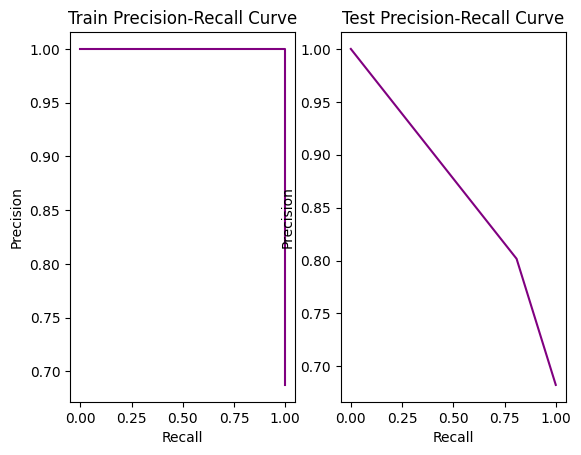

In [ ]:
import matplotlib.pyplot as plt

#create precision recall curve
fig, ax = plt.subplots(1,2)

#plot train data
ax[0].plot(training_recall_dt, training_precision_dt, color='purple')

#add axis labels to plot
ax[0].set_title('Train Precision-Recall Curve')
ax[0].set_ylabel('Precision')
ax[0].set_xlabel('Recall')



ax[1].plot(test_recall_dt, test_precision_dt, color='purple')

#add axis labels to plot
ax[1].set_title('Test Precision-Recall Curve')
ax[1].set_ylabel('Precision')
ax[1].set_xlabel('Recall')
#display plot
plt.show()

## ROC AUC curve

ROC stands for *Receiver Operating Characteristic*. This curve shows True Positive Rate (**TPR**) against False Positive Rate (**FPR**) as classifier's discrimination threshold is varied

Remember that classifiers are usually constructed based on some function classifeir taking values

    
**roc_curve** function from *scikit-learn* allows to easily obtain ROC curve points and **threshold** values.

If we want to compare metrics on different data, we can use instead True Positive Rate and False Positive Rate:
* False Positive Rate is $\frac{FP}{FP + TN}$
* True  Positive Rate is $\frac{TP}{TP + FN}$

In [ ]:
TPR = FP/(FP+TN)
FPR = TP/(TP+FN)

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

Text(0.5, 1.0, 'Test ROC AUC curve')

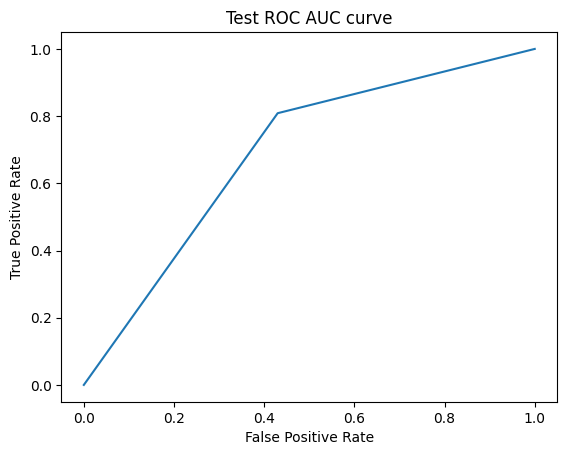

In [ ]:
fp_rates, tp_rates, thresholds = roc_curve(y_true = y_test, y_score = test_probailities[:,1])
plt.plot(fp_rates, tp_rates)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Test ROC AUC curve")


Understading ROC_AUC curve

![](https://alexanderdyakonov.files.wordpress.com/2017/07/pic2.png)

ROC-curves for the best classiefier (AUC=1), random (AUC=0.5) and worst (AUC=0) classiefier.

Thus, AUC ROC is equal to the proportion of pairs of objects of the form (object of class 1, object of class 0) that the algorithm has correctly ordered, i.e. the first object is in the ordered list earlier. Numerically , this can be written as:

choosimg a treshold for binarization
![](https://alexanderdyakonov.files.wordpress.com/2017/07/pic4.png)

In [ ]:
import plotly.express as px
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.datasets import make_classification


fig = px.area(
    x=fp_rates, y=tp_rates,
    title=f'ROC Curve (AUC={auc(fp_rates, tp_rates):.4f})',
    labels=dict(x='False Positive Rate', y='True Positive Rate'),
    width=700, height=500
)
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')
fig.ad
fig.show()

In [ ]:
fig_hist = px.histogram(
    x=test_probailities[:,1],color=y_test, nbins=50,
    labels=dict(color='True Labels', x='Score')
)
fig_hist.show()


*for later reading*

**F1 score**:

This metric allows to take into account a different cost for False Positive Errors and False Negative Errors.

General $F_\beta$ score is defined as follows:
$$
F_\beta = (1 + \beta^2) \frac{Precision \cdot Recall}{\beta^2 Precision + Recall} = \frac{1 + \beta^2}{\frac{\beta^2}{Recall} + \frac{1}{Precision}}= \frac{\beta + \beta^{-1}}{\beta\frac{1}{\text{Recall}} + \beta^{-1}\frac{1}{\text{Precision}}}
    \,.
$$

Most commonly used is $F_1$ score:
$$
F_1 = \frac{Precision \cdot Recall}{Precision + Recall}
$$

Harmonic mean is used in order to make metric value very small when Precision or Recall is close to zero. Note that $F_1$ score doesn't describe how classifier works for True Negative results (**TN**).

Interesting links on ROC AUC curve and decision trees:


1.  http://www.navan.name/roc
2.   https://alexanderdyakonov.wordpress.com/2017/07/28/auc-roc-%d0%bf%d0%bb%d0%be%d1%89%d0%b0%d0%b4%d1%8c-%d0%bf%d0%be%d0%b4-%d0%ba%d1%80%d0%b8%d0%b2%d0%be%d0%b9-%d0%be%d1%88%d0%b8%d0%b1%d0%be%d0%ba/
3.  https://www.w3schools.com/python/python_ml_decision_tree.asp

